In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#torch.manual_seed(2)

bs = 1000 # N
n = 20000 # d
dt = 1/100
h = .693

m  = torch.ones(n, device=device)
a  = lambda t: n ** (1/2) * (1-t)
ap = lambda t: -n ** (1/2)
b  = lambda t: t
bp = lambda t: 1
c  = n ** (1/2)

np.random.seed(2)
xp = np.random.randn(bs,n).T * c
x = torch.tensor(xp, device=device, dtype = torch.float)
xs = [x.cpu().numpy()]
ms = [np.sum(xs[0], axis=0)]
ps = [np.mean(ms[0]>0)]

def bf(x, t):
    x_coef    = (a(t) * ap(t) + b(t) * bp(t)) / (a(t)**2 + b(t)**2)
    tanh_coef = a(t) * (bp(t) * a(t) - b(t) * ap(t)) / (a(t)**2 + b(t)**2)
    tanh_term = torch.tanh(h + b(t) * (m @ x) / (a(t)**2 + b(t)**2))
    return x_coef * x + tanh_coef * torch.outer(m, tanh_term)

ts = np.arange(0, 1, dt)
for t in ts:
    x = x + bf(x, t) * dt
    mm = np.sum(x.cpu().numpy(), axis=0)
    p = np.mean(mm > 0)
    ps.append(p)
    print(t)
    #xs.append(x.cpu().numpy())
       
ps = np.array(ps)

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.96
0.97
0.98
0.99


In [11]:
ps

array([0.513, 0.513, 0.518, 0.52 , 0.522, 0.523, 0.528, 0.531, 0.533,
       0.538, 0.541, 0.542, 0.544, 0.547, 0.55 , 0.553, 0.557, 0.559,
       0.562, 0.563, 0.565, 0.568, 0.575, 0.578, 0.58 , 0.585, 0.59 ,
       0.594, 0.599, 0.604, 0.609, 0.614, 0.619, 0.622, 0.623, 0.627,
       0.633, 0.636, 0.639, 0.644, 0.648, 0.65 , 0.661, 0.669, 0.677,
       0.686, 0.691, 0.697, 0.704, 0.707, 0.712, 0.717, 0.722, 0.725,
       0.726, 0.733, 0.738, 0.743, 0.751, 0.758, 0.763, 0.768, 0.773,
       0.777, 0.778, 0.782, 0.787, 0.789, 0.793, 0.796, 0.798, 0.799,
       0.799, 0.8  , 0.801, 0.801, 0.802, 0.803, 0.803, 0.803, 0.803,
       0.803, 0.804, 0.804, 0.804, 0.804, 0.804, 0.804, 0.804, 0.804,
       0.804, 0.804, 0.804, 0.804, 0.804, 0.804, 0.804, 0.804, 0.804,
       0.804, 0.804])

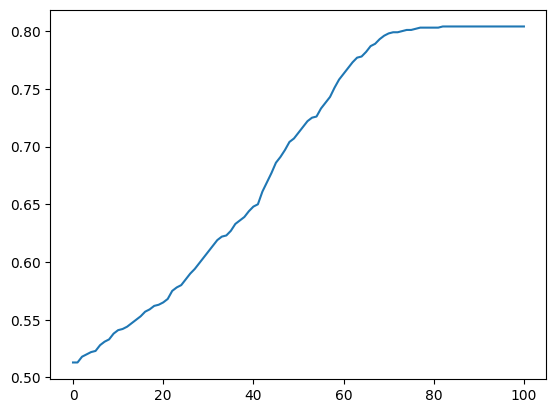

In [12]:
plt.plot(ps)